## <span style="color:green">Финальный комментарий<span>
    Спасибо за проделанную работу👍
    
    Поздравляю, проект принят🏆
    
    Успехов👍

----------

## Комментарий ревьювера 2 

Привет🤚

Спасибо за исправления и комментарии🤝

Есть нюанс в самой первой формулировке гипотез - что-то перепутано⛔️

Исправляй и отправляй на проверку⚙️

----------

## Комментарий ревьювера

Валерия, привет! 

Меня зовут, Олег Юрьев, я буду проверять твой проект.

Спасибо, что сдала проект вовремя. Тобой проделана отличная работа, проверял с удовольствием👍

Одно маленькое но:
Оформление работы - важная составляющая работы аналитика. Мало уметь делать расчёты, считать метрики или писать классный код, необходимо так же классно презентовать свою работу
  - Попробуем действовать по правилу - _«Появился график - создаем заголовок и человекочитаемые и понятные подписи для осей, с указанием единиц измерения. Не забывай, что у графика две координатных оси»_
  
Дооформляй и отправляй на проверку⚙️

В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:
## <span style="color:green">Отличная работа<span>
    Безупречная работа
## <span style="color:orange">Что можно улучшить<span>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить.
## <span style="color:red">Что нужно доработать<span>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.
 
Не удаляй комментарии, так будем следить за динамикой =)
   
    
Поехали! :)

---------

## Комментарий от Леры 2
<span style="color:blue">Привет! Спасибо за помощь с графиками и подробные ответы на все вопросы. Это первая проверка, после которой я узнала много нового и интересного. Очень тебе благодарна :) Я исправила формулировку гипотезы и взяла на заметку информацию по графикам, буду изучать :) <span>

# Оценка Тарифов

В нашем распоряжении данные за 2018 год по 500 пользователей «Мегалайна» - федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
<br><br> 
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф «Смарт»:
<ul>
    <li>Ежемесячная плата: 550 рублей</li>
    <li>Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика</li>
    <li>Стоимость услуг сверх тарифного пакета:
        <ul>
            <li>минута разговора: 3 рубля</li>
            <li>сообщение: 3 рубля</li>
            <li>1 Гб интернет-трафика: 200 рублей</li>
        </ul>
    </li>
</ul>
Тариф «Ультра»:
<ul>
    <li>Ежемесячная плата: 1950 рублей</li>
    <li>Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика</li>
    <li>Стоимость услуг сверх тарифного пакета:
        <ul>
            <li>минута разговора: 1 рубль</li>
            <li>ссообщение: 1 рубль</li>
            <li>1 Гб интернет-трафика: 150 рублей</li>
        </ul>
    </li>
</ul>
Важно: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Изучение общей информации

Импортируем необходимые для работы библиотеки.

In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
from math import factorial
from scipy import stats as st

Импортируем датасеты.

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

Посмотрим на столбцы, содержащиеся в датасетах. Выберем нужные для дальнейшей работы. 

In [3]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**id** - идентификатор звонка. Сложно представить, для чего он нам может пригодиться, но не будем спешить с его удалением.<br>
**call_date** - дата звонка. Этот столбец пригодится нам для рассчета по дням/месяцам.<br>
**duration** - длительность звонка в минутах. Мы знаем, что "Мегалайн" округляет длительность звонка в большую сторону. Нужно округлить значения столбца при проведении предобработки.<br>
**user_id** - идентификатор пользователя. Столбец, по которому мы будем объединять данные из всех таблиц.<br>

In [4]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


У нас нет пропущенных значений в рамках этой таблицы. Но есть есть проблема с форматами. <br>
Столбец **call_date** нужно привести к формату DateTime. <br>
Столбец **duration** после округления приведем к формату Int. 

In [5]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


**unnamed** - столбец, который задублировал индексы. Его смело можно удалять. <br>
**id** - столбец с идентификатором сессии. Который, как и идентификатор звонка, вряд ли нам пригодится.<br>
**mb_used** - объем потраченного за сессию интернет трафика. Пригодится. <br>
**session_date** - дата интернет-сессии. Пригодится. <br>
**user_id** - столбец, по которому мы будем объединять данные из всех таблиц. <br>

## <span style="color:orange">Что можно улучшить<span>

Столбец `Unnamed` указывает на то, что при сохранении данных был указан индексный столбец, чтобы он стал опять индексом, можно использовать аргумент `index_col`, `pd.read_csv('/datasets/internet.csv', index_col=0)`

<span style="color:blue">Спасибо за идею! <span>

In [6]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Здесь у нас тоже нет пропущенных значений. И есть проблемы с форматами. <br>
Столбец **session_date** так же нужно привести к формату DateTime.<br>
Столбец **mb_used** мы можем округлить до целого значения вверх только после группировки по пользователям и датам, поэтому сейчас мы его трогать не будем.  

In [7]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**id** - уникальный номер сообщения, как и предыдущие идентификаторы, вряд ли нам пригодятся. <br>
**message_date** - дата сообщения - пригодится. <br>
**user_id** - уже известный нам идентификатор пользователя. <br>

In [8]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Здесь тоже нет пропущенных значений и столбец с датой нужно привести к формату DateTime. 

In [9]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**messages_included** - количество сообщений в месяц, включенных в тариф <br>
**mb_per_month_included** - количество Мб в месяц, включенных в тариф<br>
**minutes_included** - количество минут разговора в месяц, включенных в тариф<br>
**rub_monthly_fee** - ежемесячная абонентская плата<br>
**rub_per_gb** - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br>
**rub_per_message** - стоимость отправки сообщения сверх тарифного пакета<br>
**rub_per_minute** - стоимость минуты разговора сверх тарифного пакета<br>
**tariff_name** - название тарифа<br>
Все столбцы из этой таблицы пока кажутся нужными. 

In [10]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Все столбцы в нужных форматах. Пропущенных значений, естественно, нет. 

In [11]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**user_id** - столбец, по которому мы будем объединять данные. <br>
**age** - возраст пользователя. Он может понадобиться нам для дополнительного анализа. Влияет ли возраст пользователя на предпочтение по тарифам? Как отличается поведение пользователей разных возрастных категорий? <br>
**churn_date** - дата прекращения пользования тарифом. Оценим, насколько нам нужен этот столбец, позже.<br>
**city** - город проживания пользователя. Этот столбец нам пригодится для оценки различий поведения пользователей по городам.<br>
**first_name** - Имя. Не пригодится.<br>
**last_name** - Фамилия. Не пригодится. <br>
**reg_date** - дата подключения тарифа. Оценим необходимость этих данных в дальнейшем. <br>
**tariff** - название тарифа. 

In [12]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


У нас есть пропущенные значения в столбце churn_date. Это столбец с датой прекращения пользования тарифом. Отсутствие значений в этом столбце означает, что пользователь продолжает пользоваться тарифом. Заполнять мы их не будем, если это не будет мешать дальнейшему анализу (тогда заполним в процессе нетипичными значениями). Гораздо интереснее рассмотреть эту категорию пользователей отдельно. <br>
Столбцы с датами так же нужно привести к нужному формату. <br>
Столбец **tariff** приведем к формату категорий, чтобы экономить память. <br>
Проанализируем столбец **city** на необходимость так же привести его к формату категорий. 

## Вывод

• В наших данных мы обнаружили не нужные для анализа столбцы, например Фамилия и Имя пользователя, и ошибочные, например, unnamed, который дублирует индексы в одной из таблиц. Их мы будем удалять. <br>
• Мы обнаружили пропущенные значения в столбце с датой окончания пользования тарифом. Эти пропуски мы не будем обрабатывать, потому что в данном случае они тоже несут в себе информацию. <br>
• Основная необходимость обработки данных - приведение данных к нужным типам. Чаще всего - это проблема столбцов с датами. <br>
• Все таблицы нам нужно будет сгруппировать по пользователям и по месяцам. Нужно ли объединять таблицы в одну - решим чуть позже, потому что сейчас очевидной причины для объединения нет, а работать с 20 столбцами в таблице менее удобно, чем обращаться к справочникам. 

## <span style="color:green">Отличная работа<span>

Спасибо за подробный обзор данных👍

## Предобработка данных 

Приступим к предобработке данных по нашему плану. Для начала - удалим все ненужные столбцы. 

### Удаление столбцов

In [13]:
data_internet = data_internet.drop(data_internet.columns[[0]], axis='columns')
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [14]:
data_users = data_users.drop(['first_name', 'last_name'], axis=1)
data_users.head()

,user_id,age,churn_date,city,reg_date,tariff
0,1000,52,NaN,Краснодар,2018-05-25,ultra
1,1001,41,NaN,Москва,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,2018-06-17,smart
3,1003,23,NaN,Москва,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,2018-05-14,ultra


У нас остались столбцы с id для всех сообщений, звонков и сессий интернета. Посмотрим, что они из себя представляют. 

In [15]:
data_internet['id']

0           1000_0
1           1000_1
2           1000_2
3           1000_3
4           1000_4
            ...   
149391    1499_152
149392    1499_153
149393    1499_154
149394    1499_155
149395    1499_156
Name: id, Length: 149396, dtype: object

Судя по всему, у каждого звонка, смс или выхода в интернет свой id. Повториться они не могут. От этих столбцов мы тоже можем избавиться. 

In [16]:
data_internet = data_internet.drop(['id'], axis=1)
data_calls = data_calls.drop(['id'], axis=1)
data_messages = data_messages.drop(['id'], axis=1)

Проверим результаты. 

In [17]:
data_internet.head()

,mb_used,session_date,user_id
0,112.95,2018-11-25,1000
1,1052.81,2018-09-07,1000
2,1197.26,2018-06-25,1000
3,550.27,2018-08-22,1000
4,302.56,2018-09-24,1000


In [18]:
data_calls.head()

,call_date,duration,user_id
0,2018-07-25,0.00,1000
1,2018-08-17,0.00,1000
2,2018-06-11,2.85,1000
3,2018-09-21,13.80,1000
4,2018-12-15,5.18,1000


In [19]:
data_messages.head()

,message_date,user_id
0,2018-06-27,1000
1,2018-10-08,1000
2,2018-08-04,1000
3,2018-06-16,1000
4,2018-12-05,1000


### Вывод

Так гораздо лучше. Теперь у нас нет лишних столбцов, которые могли бы нас запутать в процессе анализа. 

### Приведение данных к нужным типам 

Пойдем по порядку по таблицам. Обратимся к таблице data_calls. <br>
Столбец call_date нужно привести к формату DateTime.<br>
Столбец duration после округления приведем к формату Int.<br>

In [20]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
data_calls.head()

,call_date,duration,user_id
0,2018-07-25,0.0,1000
1,2018-08-17,0.0,1000
2,2018-06-11,3.0,1000
3,2018-09-21,14.0,1000
4,2018-12-15,6.0,1000


Мы обнаружили звонки, длительностью 0 минут. Вероятно, это пропущенные звонки. Посмотрим, как много у нас таких звонков. 

In [21]:
data_calls['duration'].value_counts().head()

0.0    39613
7.0    11510
6.0    11457
5.0    11411
8.0    11272
Name: duration, dtype: int64

39 тысяч из 220 тысяч строк. Это около 17% всех данных. Мы не можем их просто так отбросить. Мы планируем оценивать, как много звонков совершают пользователи тарифов. Звонки с продолжительностью 0 минут стали такими только из-за того, что другой человек не взял трубку. Это не значит, что наши пользователи не нуждаются в этих звонках. А значит, мы должны учитывать хотя бы их количество. В случае, если человек ответит на звонок, нашему пользователю понадобятся минуты. Будем работать с этими данными и проанализиурем их в дальнейшем. 

Обратимся к таблице data_internet.<br>
Столбец session_date так же нужно привести к формату DateTime.<br>
Столбец mb_used мы можем округлить до целого значения вверх только после группировки по пользователям и датам, поэтому сейчас мы его трогать не будем.<br>

In [22]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 3 columns):
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.4 MB


В таблице data_messages столбец message_date тоже нужно привести к формату DateTime.

In [23]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 2 columns):
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB


Обратимся к таблице data_users. <br>
Столбец churn_date нужно перевести в datetime. <br>
Столбец reg_date нужно перевести в datetime. <br>
Столбец tariff приведем к формату категорий, чтобы экономить память. <br>
Проанализируем столбец city на необходимость так же привести его к формату категорий. <br>

In [24]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'])
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 23.6+ KB


## <span style="color:orange">Что можно улучшить<span>

 - есть преобразования дат, в которых ты не указываешь формат даты. Рекомендую указывать всегда, так ты избежишь ошибок неправильного парсинга со стороны pandas (был в практике случай, когда я попался на этом)

<span style="color:blue">Я, кстати, так и делала до этого проекта. А потом на консультациях наставников увидела, что они это не делают. Решила в этот раз попробовать, насколько сработает такой метод. Сработал, но уверенность в корректности данных пропала. Буду продолжать делать с форматом. <span>

## <span style="color:orange">Комментарий<span>

Конечно, на python надейся, а сам не плошай =) Хорошо, когда всё под контролем.

In [25]:
data_users['tariff'] = data_users['tariff'].astype('category')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null category
dtypes: category(1), datetime64[ns](2), int64(2), object(1)
memory usage: 20.2+ KB


In [26]:
data_users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Нижневартовск       1
Подольск            1
Химки               1
Архангельск         1
Иваново             1
Name: city, Length: 76, dtype: int64

Часто встречающихся значений не так много, но мы попробуем и посмотрим на объемы занимаемой памяти.

In [27]:
data_users['city'] = data_users['city'].astype('category')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null category
reg_date      500 non-null datetime64[ns]
tariff        500 non-null category
dtypes: category(2), datetime64[ns](2), int64(2)
memory usage: 19.9 KB


Изменение не очень большое, но копейка рубль бережет, а килобайт - мегабайты и тд. 

## <span style="color:green">Отличная работа<span>

Отличное использование нововведений в `pandas` =)

<span style="color:blue">О каких нововведениях речь? О приведении столбцов к типу category? Если да, то это после прочтения очень крутой статьи на тему оптимизации хранения данных. Приведение столбца к типу category -  очень быстрая оптимизация пространства, от которой пользователю ни горячо, ни холодно, а вот памяти ест меньше. Мне очень понравилось) <span>

## <span style="color:orange">Комментарий<span>

Да, именно о `category` и кажется, я знаю о какой статье идет речь =)

### Вывод

С изменением форматов столбцов мы закончили. Теперь наши таблицы меньше весят и быстрее грузятся. <br>
В процессе работы с типами даннных мы обнаружили звонки с нулевой длительностью. Вероятно, это звонки, которые остались без ответа. Запомним это и проанализируем позже. 

### Группировка данных

Весь анализ мы будем проводить в разрезе пользоваелей и месяцев. Для начала, объединим все нужные нам таблицы в одну. 

In [28]:
data_calls['month'] = data_calls['call_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month

Теперь сгруппируем таблицы по пользователям и по месяцам.

In [29]:
calls_grouped = data_calls.groupby(['user_id', 'month']).agg(calls_count=('duration', len), duration=('duration', sum))
calls_grouped.head(10)

calls_count  duration
user_id month                       
1000    5             22.0     159.0
        6             43.0     172.0
        7             47.0     340.0
        8             52.0     408.0
        9             58.0     466.0
        10            57.0     350.0
        11            43.0     338.0
        12            46.0     333.0
1001    11            59.0     430.0
        12            63.0     414.0

In [30]:
messages_grouped = data_messages.groupby(['user_id', 'month']).agg(message_count=('message_date', len))
messages_grouped.head(10)

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
        10                73
        11                58
        12                70
1002    6                  4
        7                 11

In [31]:
internet_grouped = data_internet.groupby(['user_id', 'month']).agg(mb_used=('mb_used', sum))
internet_grouped.head(10)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

Столбец mb_used нужно округлить до целого значения. Теперь мы можем это сделать. 

In [32]:
internet_grouped['mb_used'] = internet_grouped['mb_used'].apply(np.ceil)
internet_grouped.head()

mb_used
user_id month         
1000    5       2254.0
        6      23234.0
        7      14004.0
        8      14056.0
        9      14569.0

Объединим данные таблицы в одну. 

In [33]:
data = calls_grouped.join(messages_grouped, how='outer').join(internet_grouped, how='outer')
data = data.reset_index() 
data.head(12)

,user_id,month,calls_count,duration,message_count,mb_used
0,1000,5,22.0,159.0,22.0,2254.0
1,1000,6,43.0,172.0,60.0,23234.0
2,1000,7,47.0,340.0,75.0,14004.0
3,1000,8,52.0,408.0,81.0,14056.0
4,1000,9,58.0,466.0,57.0,14569.0
5,1000,10,57.0,350.0,73.0,14703.0
6,1000,11,43.0,338.0,58.0,14757.0
7,1000,12,46.0,333.0,70.0,9818.0
8,1001,11,59.0,430.0,NaN,18430.0
9,1001,12,63.0,414.0,NaN,14037.0


Объединим полученную таблицу с информацией о пользователях. 

In [34]:
data = data.merge(data_users, on='user_id')
data.head(10)

,user_id,month,calls_count,duration,message_count,mb_used,age,churn_date,city,reg_date,tariff
0,1000,5,22.0,159.0,22.0,2254.0,52,NaT,Краснодар,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23234.0,52,NaT,Краснодар,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14004.0,52,NaT,Краснодар,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14056.0,52,NaT,Краснодар,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,14569.0,52,NaT,Краснодар,2018-05-25,ultra
5,1000,10,57.0,350.0,73.0,14703.0,52,NaT,Краснодар,2018-05-25,ultra
6,1000,11,43.0,338.0,58.0,14757.0,52,NaT,Краснодар,2018-05-25,ultra
7,1000,12,46.0,333.0,70.0,9818.0,52,NaT,Краснодар,2018-05-25,ultra
8,1001,11,59.0,430.0,NaN,18430.0,41,NaT,Москва,2018-11-01,smart
9,1001,12,63.0,414.0,NaN,14037.0,41,NaT,Москва,2018-11-01,smart


In [35]:
data_tariffs.rename(columns= {'tariff_name' : 'tariff'}, inplace=True)
data = data.merge(data_tariffs, on='tariff')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
calls_count              3174 non-null float64
duration                 3174 non-null float64
message_count            2717 non-null float64
mb_used                  3203 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null category
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: category(1), datetime64[ns](2), float64(4), in

Переведем столбцы типа float в int, предварительно заполнив пропуски нулями, потому что отсутствие значений в этих столбцах означает, что пользователь не звонил/не отправлял смс/не использовал интернет. 

In [36]:
data['calls_count'] = data['calls_count'].fillna(0).astype(int)
data['duration'] = data['duration'].fillna(0).astype(int)
data['message_count'] = data['message_count'].fillna(0).astype(int)
data['mb_used'] = data['mb_used'].fillna(0).astype(int)
data.head()

,user_id,month,calls_count,duration,message_count,mb_used,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,2254,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,60,23234,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,75,14004,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,81,14056,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,57,14569,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


### Вывод

Мы сгруппировали данные по пользователям и объединили их в одну таблицу. Добавим необходимые для анализа столбцы. 

### Добавление необходимых столбцов 

Мы уже посчитали и добавили:<br>
•Количество сделанных звонков и израсходованных минут по месяцам<br>
•Количество отправленных сообщений по месяцам<br>
•Объем израсходованного интернет-трафика по месяцам<br>
Осталось добавить **помесячную выручку с каждого пользователя**. <br>
Напишем функцию, которая будет принимать на вход значения израсходованных минут/смс/интернета и, в случае перерасхода, отдавать сумму переплаты. 

In [37]:
data['total_profit'] = None


def profit(data):
    for row in range(len(data)):
        pay_for_minutes = 0
        pay_for_messages = 0
        pay_for_internet = 0
        if data.loc[row, 'duration'] > data.loc[row, 'minutes_included']:
            pay_for_minutes = (data.loc[row, 'duration'] - data.loc[row, 'minutes_included']) * data.loc[row, 'rub_per_minute']
        if data.loc[row, 'message_count'] > data.loc[row, 'messages_included']:
            pay_for_messages = (data.loc[row, 'message_count'] - data.loc[row, 'messages_included']) * data.loc[row, 'rub_per_message']
        if data.loc[row, 'mb_used'] > data.loc[row, 'mb_per_month_included']:
            pay_for_internet = np.ceil(((data.loc[row, 'mb_used'] - data.loc[row, 'mb_per_month_included']) / 1024)) * data.loc[row, 'rub_per_gb']
        total_profit = data.loc[row, 'rub_monthly_fee'] + pay_for_minutes + pay_for_messages + pay_for_internet
        data.loc[row, 'total_profit'] = total_profit
        
profit(data)
data.head()

,user_id,month,calls_count,duration,message_count,mb_used,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_profit
0,1000,5,22,159,22,2254,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,43,172,60,23234,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,47,340,75,14004,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,52,408,81,14056,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,58,466,57,14569,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950


### Вывод

Мы посчитали и добавили в таблицу количество сделанных за месяц звонков, израсходованных минут, смс, мб интернета, а также помесячную выручку с каждого пользователя. 

## Вывод

Мы предобработали данные - разобрались с пропусками, привели столбцы к нужным форматам, удалили ненужные столбцы и добавили нужные. И наконец - объединили необходимые нам таблицы в одну для удобства работы. <br>
В процессе работы с типами даннных мы обнаружили звонки с нулевой длительностью. Вероятно, это звонки, которые остались без ответа. Запомним это и проанализируем позже. <br>
И теперь мы наконец можем приступить к анализу данных. 

## Анализ данных

Мы приступаем к анализу данных. Нам предстоит описать поведение клиентов оператора, исходя из выборки.<br>
Сколько минут разговора, сколько сообщений и какой объем трафика требуется пользователям каждого тарифа в месяц? 
1. Посчитать среднее количество, дисперсию и стандартное отклонение. 
2. Построить гистограммы. 
3. Описать распределения.



Выведем информацию по тарифам на будущее. 

In [38]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Сделаем срезы по тарифам для удобства анализа. 

In [39]:
data_smart = data.query('tariff == "smart"')
data_ultra = data.query('tariff == "ultra"')
data_smart.head()

,user_id,month,calls_count,duration,message_count,mb_used,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_profit
985,1001,11,59,430,0,18430,41,NaT,Москва,2018-11-01,smart,50,15360,500,550,200,3,3,1150
986,1001,12,63,414,0,14037,41,NaT,Москва,2018-11-01,smart,50,15360,500,550,200,3,3,550
987,1002,6,15,117,4,10857,59,NaT,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3,550
988,1002,7,26,214,11,17581,59,NaT,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3,1150
989,1002,8,42,289,13,20320,59,NaT,Стерлитамак,2018-06-17,smart,50,15360,500,550,200,3,3,1550


#### Минуты

Посчитаем средний расход минут для пользователей. Для анализа звонков будем брать срезы с длительностью звонка больше 0. 

In [40]:
print('Средний расход минут для тарифа Smart', data_smart.query('duration > 0')['duration'].mean())
print('Средний расход минут для тарифа Ultra', data_ultra.query('duration > 0')['duration'].mean())

Средний расход минут для тарифа Smart 419.4403421882035
Средний расход минут для тарифа Ultra 547.7550158394931


Средний расход минут у пользователей тарифа Ультра выше. Пока это кажется логичным - в тарифе Ультра включено больше минут. Посчитаем дисперсию и стандартное отклонение для выборок. 

In [41]:
print('Дисперсия: тариф Smart', np.var(data_smart.query('duration > 0')['duration'], ddof=1))
print('Дисперсия: тариф Ultra', np.var(data_ultra.query('duration > 0')['duration'], ddof=1))

Дисперсия: тариф Smart 35718.128533936906
Дисперсия: тариф Ultra 93338.42829141095


In [42]:
print('Стандартное отклонение: тариф Smart', np.std(data_smart.query('duration > 0')['duration'], ddof=1))
print('Стандартное отклонение: тариф Ultra', np.std(data_ultra.query('duration > 0')['duration'], ddof=1))

Стандартное отклонение: тариф Smart 188.99240337626512
Стандартное отклонение: тариф Ultra 305.5133847991131


Стандартное отклонение двух выборок значительно отличается. Разброс расхода минут у тарифа Ультра на треть больше. При сложении среднего и стандартного отклонения можно увидеть, что значительной части пользователей тарифа Smart не хватает включенных в тариф минут. Проверим это на гистограме. <br><br>
Посчитаем среднее + 3 стандартных отклонения для тарифа Ультра. 

In [43]:
data_ultra.query('duration > 0')['duration'].mean() + 3 * (np.std(data_ultra.query('duration > 0')['duration'], ddof=1))

1464.2951702368325

Мы знаем, что большая часть значений (практически 99%) лежит в промежутке среднее +- 3 стандартных отклонения. А это значит, что основной массе пользователей тарифа Ультра хватает включенных в тариф минут. <br><br>
Построим гистограмы и посмотрим на распределения по тарифам. 

Тариф Smart


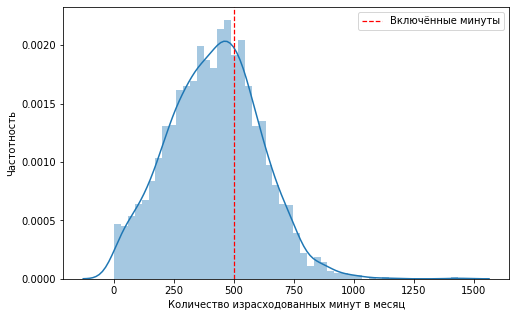

Тариф Ultra


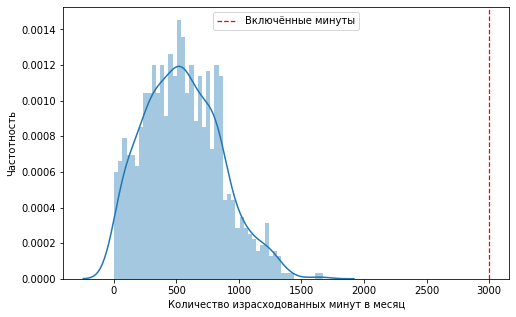

In [44]:
print('Тариф Smart')
sns.distplot(data_smart.query('duration > 0')['duration'], bins=50)\
    .set(xlabel='Количество израсходованных минут в месяц', ylabel='Частотность')
# добавление линии доступных согласно тарифу минут
plt.axvline(500, color='red', linestyle='--', linewidth=1.25, label='Включённые минуты')
plt.legend()
plt.show()
print('Тариф Ultra')
sns.distplot(data_ultra.query('duration > 0')['duration'], bins=50)\
    .set(xlabel='Количество израсходованных минут в месяц', ylabel='Частотность')
plt.axvline(3000, color='red', linestyle='--', linewidth=1.25, label='Включённые минуты')
plt.legend()
plt.show()

Гистограмы подтверждают сделанные нами ранее выводы. Большая часть пользоваталей тарифа Ультра укладывается в отведенные им минуты (и у них даже остаются лишние, а вот пользователям тарифа смарт их минут часто не хватает. 
<br><br>
Можно заметить, что распределения достаточно похожи. Отличие в среднем расходе минут в месяц незначительно. 

## <span style="color:orange">Что можно улучшить<span>

Отличное сравнение =)

Также на графики распределений можно добавить линию включенных в тариф минут, так нагляднее покажешь, кому чего хватает.

<span style="color:blue">Не могу найти, как это сделать :( Подскажите, пожалуйста. В документации тоже не могу найти.<span>

`plt.axvline(3000, color='red', linestyle='--', linewidth=1.25, label='Включённые минуты')`

<span style="color:green">Добавил на график =)</span>

Краткое руководство по `matplotlib` - https://pyprog.pro/mpl/mpl_short_guide.html - seaborn и интерактивные библиотеки хорошо, но основы знать нужно!

<span style="color:blue">Спасибо большое! Это очень круто!<span>

Посчитаем, сколько минут хватит 99% пользователей каждого тарифа. Прибавим к среднему три стандартных отклонения. 

In [45]:
print('Достаточное количество минут для 99% пользователей тарифа Smart', (data_smart.query('duration > 0')['duration'].mean() + (3 * np.std(data_smart.query('duration > 0')['duration'], ddof=1))))
print('Достаточное количество минут для 99% пользователей тарифа Ultra', (data_ultra.query('duration > 0')['duration'].mean() + (3 * np.std(data_ultra.query('duration > 0')['duration'], ddof=1))))


Достаточное количество минут для 99% пользователей тарифа Smart 986.4175523169988
Достаточное количество минут для 99% пользователей тарифа Ultra 1464.2951702368325


Мы уже говорили о том, что практически всем пользователям тарифа Ультра хватает включенных минут, а значительной части пользователей тарифа Смарт включенных в тариф минут недостаточно. Компания, конечно же, может заработать на оплаченных дополнительных минутах пользователей тарифа Смарт. Позже мы узнаем, как отличается выручка от пользователей двух тарифов.

#### Сообщения

Проанализируем, как много соообщений отправляют пользователи двух тарифов. Посчитаем средний расход смс для пользователей. 

In [46]:
print('Средний расход смс для тарифа Smart', data_smart['message_count'].mean())
print('Средний расход смс для тарифа Ultra', data_ultra['message_count'].mean())

Средний расход смс для тарифа Smart 33.384028712427096
Средний расход смс для тарифа Ultra 49.36345177664975


У пользователей тарифа Ультра в пакет включено 1000 сообщений. При этом в среднем они отправляют только 49 сообщений в месяц. Как и с минутами, часто значительная часть включенных в пакет сообщений им не пригождается. Но найдем дисперсию и стандартное отклонение, чтобы понять разброс значений. 

In [47]:
print('Дисперсия: тариф Smart', np.var(data_smart['message_count'], ddof=1))
print('Дисперсия: тариф Ultra', np.var(data_ultra['message_count'], ddof=1))

Дисперсия: тариф Smart 796.8129584480083
Дисперсия: тариф Ultra 2285.266142544674


In [48]:
print('Стандартное отклонение: тариф Smart', np.std(data_smart['message_count'], ddof=1))
print('Стандартное отклонение: тариф Ultra', np.std(data_ultra['message_count'], ddof=1))

Стандартное отклонение: тариф Smart 28.22787555676141
Стандартное отклонение: тариф Ultra 47.80445735017472


Построим гистограму и посмотрим на распределение. 

Тариф Smart


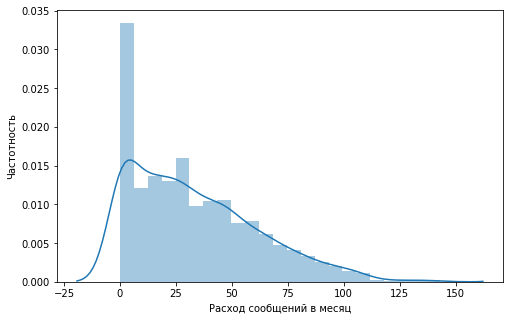

Тариф Ultra


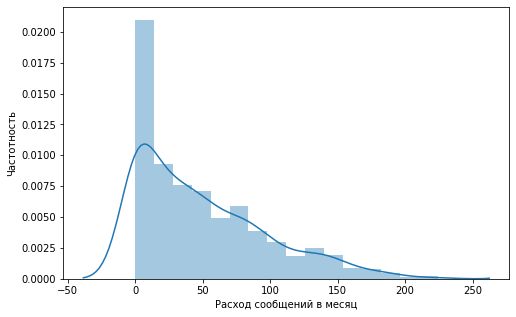

In [49]:
print('Тариф Smart')
sns.distplot(data_smart['message_count']).set(xlabel='Расход сообщений в месяц', ylabel='Частотность');
plt.show()
print('Тариф Ultra')
sns.distplot(data_ultra['message_count']).set(xlabel='Расход сообщений в месяц', ylabel='Частотность');
plt.show()

Мы видим пики около нуля. Многие пользователи вообще не отправляют сообщения. Это не новость - при наличии интернета сообщениями пользуются крайне редко. Отфильтруем данные, убрав из них нулевые значения. 

Тариф Smart. Без нулевых значений


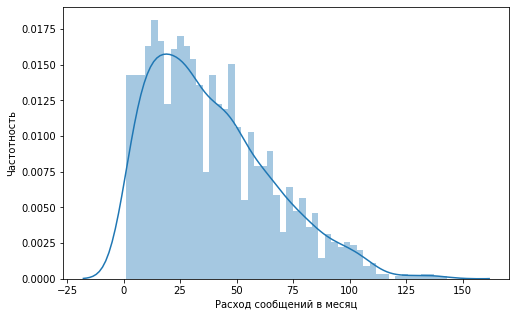

Тариф Ultra. Без нулевых значений


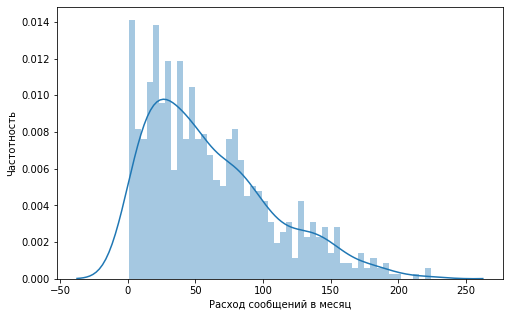

In [50]:
print('Тариф Smart. Без нулевых значений')
sns.distplot(data_smart.query('message_count > 0')['message_count'], bins=50).set(xlabel='Расход сообщений в месяц', ylabel='Частотность');
plt.show()
print('Тариф Ultra. Без нулевых значений')
sns.distplot(data_ultra.query('message_count > 0')['message_count'], bins=50).set(xlabel='Расход сообщений в месяц', ylabel='Частотность');
plt.show()

Исходя из всех описанных выше данных, можно сделать вывод, что пользователи тарифа Ультра в среднем отправляют больше смс, но не пропорционально увеличенному количеству включенных в тариф смс. Значительная часть пользователей не отправляет смс вообще. 

#### Интернет

Проанализируем, как пользователи разных тарифов используют интернет. Вспомним, что в тарифе Смарт включено 15360 Мб в месяц, а в тарифе Ультра 30720 Мб. Посчитаем средний расход интернета для пользователей. 

In [51]:
print('Средний расход интернета для тарифа Smart', data_smart['mb_used'].mean())
print('Средний расход интернета для тарифа Ultra', data_ultra['mb_used'].mean())

Средний расход интернета для тарифа Smart 16208.873485868102
Средний расход интернета для тарифа Ultra 19469.308629441624


Ситуация для нас не новая. Пользователи тарифа Ультра в среднем используют больше интернета. Посчитаем дисперсию, стандартное отклонение и построим гистограмы, чтобы понять, как много интернета нужно пользователям. 

In [52]:
print('Дисперсия: тариф Smart', np.var(data_smart['mb_used'], ddof=1))
print('Дисперсия: тариф Ultra', np.var(data_ultra['mb_used'], ddof=1))

Дисперсия: тариф Smart 34462562.80624911
Дисперсия: тариф Ultra 101751557.96562667


In [53]:
print('Стандартное отклонение: тариф Smart', np.std(data_smart['mb_used'], ddof=1))
print('Стандартное отклонение: тариф Ultra', np.std(data_ultra['mb_used'], ddof=1))

Стандартное отклонение: тариф Smart 5870.482331652921
Стандартное отклонение: тариф Ultra 10087.197726109402


Тариф Smart


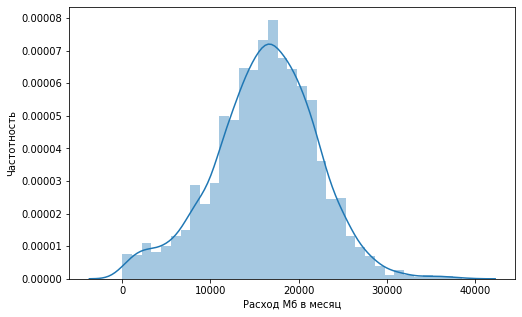

Тариф Ultra


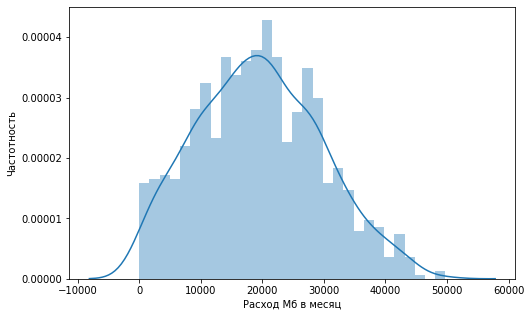

In [54]:
print('Тариф Smart')
sns.distplot(data_smart['mb_used']).set(xlabel='Расход Мб в месяц', ylabel='Частотность');
plt.show()
print('Тариф Ultra')
sns.distplot(data_ultra['mb_used'], bins=30).set(xlabel='Расход Мб в месяц', ylabel='Частотность');
plt.show()

Теперь мы видим, что интернета, в отличие от звонков и смс, не хватает пользователям обоих тарифов. И те, и другие платят за дополнительные гигабайты. Неплохой источник заработка для компании Мегалайн. Пользователи тарифа Смарт превышают свое ограничение интернета в 2 раза - им бы вполне хватило ограничений тарифа Ультра. При переплате в 200 рублей за Гигабайт (15 Гб = около 15000 Мб) пользователи, которые используют около 30000 Мб переплачивают 3000 рублей за интернет. При переходе на тариф Ультра, в котором уже включены нужные им Мб интернета, они могли бы экономить 1600 рублей ежемесячно. 

## Вывод

Мы посчитали среднее, стандартное отклонение и построили гистограмы для расхода минут, смс и интернета. Выяснили, что многим пользователям тарифа Смарт не хватает включенных минут, смс и интернета, в отличие от пользователей тарифа Ультра, которым минут и смс хватает почти всегда. <br>
Мы узнали, что некоторым пользователям тарифа Смарт экономически выгодно перейти на тариф Ультра и получить увеличенный пакет интернета. 
<br> Перейдем к формированию и проверке гипотез. 

## Проверка гипотез 

Проверим гипотезы:<br>
• средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;<br>
• средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;<br>

#### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Начнем с первой гипотезы. <br>
Сформируем **Н0(нулевую гипотезу)** = средняя выручка по пользователям тарифа Ультра = средней выручке по пользователям тарифа Смарт. <br>
Важно помнить, что у нас есть только выборка.<br>
**Н1(альтернативная гипотеза)** будет такой: средняя выручка по пользователям тарифа Ультра != (а значит, больше или меньше) средней выручки по пользователям тарифа Смарт. <br>
Используем критерий t-Стьюдента для проверки гипотезы. Пороговое значение Альфа установим равное 0.05. <br>
Критерий t-Стьюдента наиболее хорошо работает с выборками с нормальным распределением, при этом, при количестве элементов в выборке более 30, мы можем использовать критерий t-Стьюдента и для других распределений. Поэтому мы не будем предварительно проверять распределение выборок. 

## <span style="color:red">Комментарий<span>

Тут остановимся подробнее:

**Генеральная совокупность** - это все пользователи нашего тарифа, даже те, которые к нам придут потом или сейчас являются пользователями другого тарифа. Она нам практически никогда не доступна.

Мы всегда работаем с **выборками**

Поэтому корректнее формулировать гипотезы, например так, **H0** - _Средняя выручка пользователей тарифа смарт равна средней выручке пользователей тарифа ультра_ - лучше вообще не использовать генеральную совокупность.

In [55]:
alpha = 0.05
result = st.ttest_ind(
    data_smart['total_profit'],
    data_ultra['total_profit'])
print('p-значение = ', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение =  1.4229814360704127e-160
Отвергаем нулевую гипотезу


По результам теста, мы отвергаем нулевую гипотезу о равенсва средних выручек по двум тарифам. Значит, мы допускаем, что разница в средней выручке пользователей тарифов Ультра и Смарт существует. Теперь построим гистограмы распределения для наглядного примера. 

Распределение выручек с пользователей


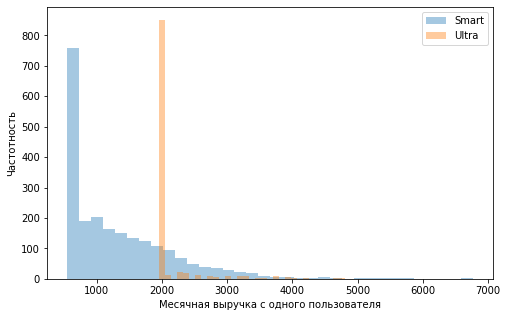

In [56]:
print('Распределение выручек с пользователей')
sns.distplot(data_smart['total_profit'], kde=False, label='Smart')\
    .set(xlabel='Месячная выручка с одного пользователя', ylabel='Частотность');
#plt.show()
#print('Тариф Ultra')
sns.distplot(data_ultra['total_profit'], kde=False, label='Ultra')\
    .set(xlabel='Месячная выручка с одного пользователя', ylabel='Частотность');
#plt.xlim(1500, 3500);
plt.legend()
plt.show()

Да уж, выручки в выборках действительно отличаются. Пользователи тарифа Ультра крайне редко оплачивают дополнительные опции. Разброс выручки по пользователем тарифа Смарт заметно больше. Проверим, в какую сторону все-таки отличаются средние этих двух тарифов. 

## <span style="color:orange">Что можно улучшить<span>

В данном случае очень полезно на одном графике показать распределения

<span style="color:blue">Тоже не могу найти, как это сделать.<span>
    
<span style="color:green">Указал в коде =) Достаточно друг за другом вывести нужные распределения<span>

<span style="color:blue">Спасибо!<span>

In [57]:
print(data_smart['total_profit'].mean())
print(data_ultra['total_profit'].mean())

1289.9735307312696
2070.1522842639592


Несмотря на больший разброс, средняя выручка по тарифу смарт все-таки меньше. А значит, для компании выгоднее продвижение тарифа Ультра. 

#### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Н0: среднее total_profit пользователей из Москвы = среднему total_profit пользователей из других регионов. <br>
Н1: среднее total_profit пользователей из Москвы != (больше или меньше) среднему total_profit пользователей из других регионов.<br> 
Пороговое значение alpha = 0.05.<br>

Сделаем срезы по нужным параметрам. 

In [58]:
data_moscow = data.query('city == "Москва"')
data_not_moscow = data.query('city != "Москва"')
data_moscow.head()

,user_id,month,calls_count,duration,message_count,mb_used,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_profit
8,1003,8,55,380,37,8566,23,NaT,Москва,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950
9,1003,9,134,961,91,12469,23,NaT,Москва,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950
10,1003,10,108,855,83,14769,23,NaT,Москва,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950
11,1003,11,115,824,94,11357,23,NaT,Москва,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950
12,1003,12,108,802,75,10122,23,NaT,Москва,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950


In [59]:
alpha = 0.05
result = st.ttest_ind(
    data_moscow['total_profit'],
    data_not_moscow['total_profit'])
print('p-значение = ', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение =  0.5440152911670206
Не получилось отвергнуть нулевую гипотезу


В отличие от разницы выручки по тарифам, здесь у нас не получилось отвергнуть нулевую гипотезу. А это значит, что пользователи из Москвы, вероятно, платят ни больше, ни меньше, чем пользователи из регионов. 

## Вывод

1. Средняя выручка по тарифам Смарт и Ультра, скорее всего, отличаются. При этом в выборке выручка по тарифу Смарт, в среднем, меньше, чем выручка по тарифу Ультра, несмотря на значительное количество пользователей, которые оплачивают дополнительные опции. 
2. Средняя выручка пользователей по Москве и по регионам, скорее всего, не отличается. Пользователи в Москве тратят на сотовую связь столько же, сколько пользователи в регионах. 

# Общий вывод

Перед нами стояла задача выяснить, какой тариф приносит больше денег компании Мегалайн. Мы проанализировали данные по случайной выборке некоторых пользователей и выяснили, что пользователи тарифа Смарт чаще оплачивают дополнительные минуты и интернет, что является дополнительным источником дохода для компании. Но даже это не влияет на среднюю выручку по пользователям настолько, чтобы стать для компании выгоднее тарифа Ультра.<br>
Реклама тарифа Ультра среди новых пользователей и среди постоянных пользователей может увеличить выручку компании. При этом пользователи тарифа Смарт при переходе на тариф Ультра иногда смогут даже сэкономить, исключив, например, переплаты за интернет. 

## <span style="color:red">Что нужно доработать<span>
    Можно ли предложить еще какие-либо рекомендации компании «Мегалайн»?

<span style="color:blue">Что, например? Расширить тарифные нормы для тарифа Смарт? Создать дополнительный промежуточный тариф? Создание дополнительного промежуточного тарифа было бы интересно рассмотреть, потому что приблизительно половина пользователей Смарта переплачивает в течение месяца, испытывая при этом какой-то дискомфорт (неопределенность в начале месяца, сколько именно денег ты потратишь на услуги связи). При этом тариф Ультра для них достаточно большой. Они не израсходуют весь пакет и такая значительная переплата для них невыгодна. А вот промежуточный тариф мог бы решить эту проблему. Кстати, часть пользователей тарифа Ультра тоже, наверняка, перешли бы на промежуточный тариф. <span>

## <span style="color:orange">Комментарий<span>
Ну вот, уже и полезные рекомендации нашлись.

Аналитик должен широко смотреть на задачу и со стороны бизнеса и со стороны пользователя =)

## <span style="color:orange">Что можно улучшить<span>

Общий вывод может содержат в сжатом виде комментарии по всем этапам анализа, тогда в любой момент обратившись к работе, не потребуется просматривать её код, достаточно заглянуть в вывод.

<span style="color:blue">Так я же вроде коротко как раз расписала все выводы? Я не стала копировать полностью выводы, потому что тогда чтение работы было бы неинтересным - каждый вывод дублировал бы частично какой-то подвывод. А я написала кратко, на что стоит обратить внимание, а если хочется более подробно по какому-то пункту, то можно перейти к этому блоку. Или так плохо? <span>

## <span style="color:orange">Комментарий<span>
Это всего лишь рекомендация =)
    
Не обязательно переписывать в полном объеме, а тезисно, например:
- Рассмотрели поведение пользователей двух тарифов - «Смарт» и «Ультра»
- 67% пользователей тарифа «Смарт» переплачивает, потому что им не хватает включенных минут и траффика
- Ни на одном тарифе смс не пользуются популярностью - их кол-во можно сокращать
- ....